<a href="https://colab.research.google.com/github/cynthiacc512/TA-prediksi-stroke-dnn-dropout/blob/main/DNN_Lib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn.model_selection import learning_curve

In [ ]:
# pip install plot_keras_history

# Data Preprocessing

In [ ]:
df = pd.read_csv('stroke.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


### Drop column

In [ ]:
df.drop(['id'], axis=1, inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


### Cek Data Null

In [ ]:
df.isnull().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [ ]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df['smoking_status'] = df['smoking_status'].replace(np.nan, 'unknown')

In [ ]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,unknown,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,unknown,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


### Encoding

In [ ]:
df['gender'].replace(['Male', 'Female', 'Other'],[0, 1, 2], inplace=True)
df['ever_married'].replace(['No', 'Yes'],[0, 1], inplace=True)
df['work_type'].replace(['Never_worked', 'children', 'Govt_job', 'Private', 'Self-employed'],[0, 1, 2, 3, 4], inplace=True)
df['Residence_type'].replace(['Rural', 'Urban'],[0, 1], inplace=True)
df['smoking_status'].replace(['unknown','never smoked', 'formerly smoked', 'smokes'],[0, 1, 2,3], inplace=True)

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,3.0,0,0,0,1,0,95.12,18.0,0,0
1,0,58.0,1,0,1,3,1,87.96,39.2,1,0
2,1,8.0,0,0,0,3,1,110.89,17.6,0,0
3,1,70.0,0,0,1,3,0,69.04,35.9,2,0
4,0,14.0,0,0,0,0,0,161.28,19.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,1,10.0,0,0,0,1,1,58.64,20.4,1,0
43396,1,56.0,0,0,1,2,1,213.61,55.4,2,0
43397,1,82.0,1,0,1,3,1,91.94,28.9,2,0
43398,0,40.0,0,0,1,3,1,99.16,33.2,1,0


### Cek Data Duplikat

In [ ]:
df[df.duplicated()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
df.drop_duplicates(keep='last')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,3.0,0,0,0,1,0,95.12,18.0,0,0
1,0,58.0,1,0,1,3,1,87.96,39.2,1,0
2,1,8.0,0,0,0,3,1,110.89,17.6,0,0
3,1,70.0,0,0,1,3,0,69.04,35.9,2,0
4,0,14.0,0,0,0,0,0,161.28,19.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,1,10.0,0,0,0,1,1,58.64,20.4,1,0
43396,1,56.0,0,0,1,2,1,213.61,55.4,2,0
43397,1,82.0,1,0,1,3,1,91.94,28.9,2,0
43398,0,40.0,0,0,1,3,1,99.16,33.2,1,0


### Cleaning Outliers

In [ ]:
column = ['age','avg_glucose_level','bmi']
df[column].describe()

,age,avg_glucose_level,bmi
count,43400.000000,43400.000000,43400.000000
mean,42.217894,104.482750,28.605038
std,22.519649,43.111751,7.638023
min,0.080000,55.000000,10.100000
25%,24.000000,77.540000,23.400000
50%,44.000000,91.580000,28.100000
75%,60.000000,112.070000,32.600000
max,82.000000,291.050000,97.600000


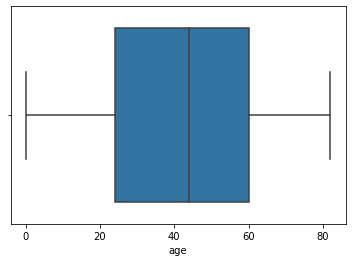

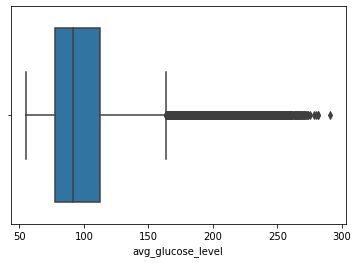

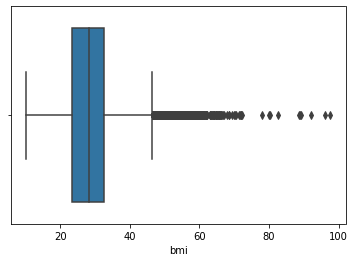

In [ ]:
for cols in column:
  sns.boxplot(x=df[cols])
  plt.show()

In [ ]:
df = df[(df['bmi'] <= 54 )]
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,43117.000000,43117.000000,43117.000000,43117.000000,43117.000000,43117.000000,43117.000000,43117.000000,43117.000000,43117.000000,43117.000000
mean,0.591159,42.201443,0.092933,0.047545,0.642855,2.733423,0.501334,104.341120,28.401391,1.167915,0.018114
std,0.492144,22.562909,0.290342,0.212804,0.479163,0.904601,0.500004,42.946278,7.215377,1.027503,0.133363
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,10.100000,0.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.530000,23.400000,0.000000,0.000000
50%,1.000000,44.000000,0.000000,0.000000,1.000000,3.000000,1.000000,91.560000,28.000000,1.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,3.000000,1.000000,111.960000,32.500000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,291.050000,54.000000,3.000000,1.000000


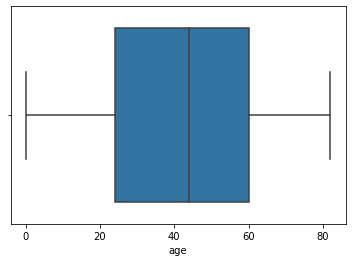

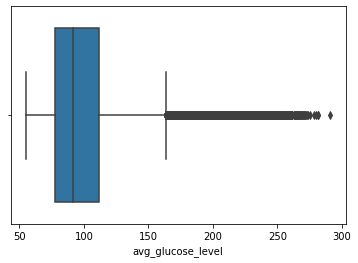

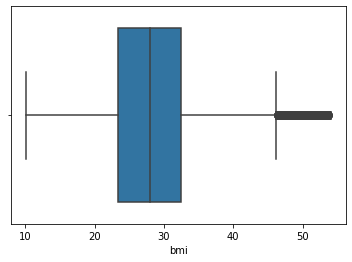

In [ ]:
for cols in column:
  sns.boxplot(x=df[cols])
  plt.show()

## Handling Imbalanced Class

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


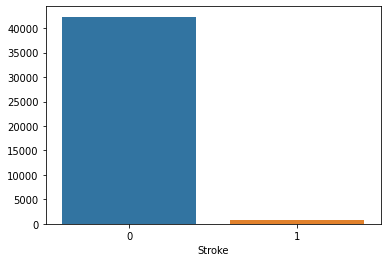

Tidak stroke (0) :  42336
Terkena stroke (1) :  781


In [ ]:
xs = df['stroke'].value_counts().index
ys = df['stroke'].value_counts().values

ax = sns.barplot(xs, ys)
ax.set_xlabel("Stroke")
plt.show()
print("Tidak stroke (0) : ", str(ys[0]))
print("Terkena stroke (1) : ", str(ys[1]))

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,3.0,0,0,0,1,0,95.12,18.0,0,0
1,0,58.0,1,0,1,3,1,87.96,39.2,1,0
2,1,8.0,0,0,0,3,1,110.89,17.6,0,0
3,1,70.0,0,0,1,3,0,69.04,35.9,2,0
4,0,14.0,0,0,0,0,0,161.28,19.1,0,0


## Split Dataset

In [ ]:
x  = df[['gender','age','hypertension','heart_disease','ever_married','work_type', 'Residence_type','avg_glucose_level', 'bmi','smoking_status']]
y = df['stroke']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
21019,0,34.0,0,0,1,2,1,124.47,36.7,1
41033,0,25.0,0,0,1,3,1,165.25,34.3,3
10335,1,65.0,0,0,1,3,1,103.72,25.8,1
9754,0,46.0,0,0,1,2,1,105.07,28.9,3
18348,1,48.0,0,0,1,3,0,84.18,40.1,0


In [ ]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Deep Neural Network

In [ ]:
weights_assigned = {0:1, 1:(42336/781)}

In [ ]:
print(weights_assigned)

{0: 1, 1: 54.20742637644046}


In [ ]:
lr = 0.1
hl = 4
AF = 'relu'
epoch = 100

In [ ]:
units = 10

model = Sequential()

model.add(Dense(units, activation = AF, input_dim = 10))
for i in range(hl):
  model.add(Dense(units, activation = AF))

model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=lr)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train_scaled, y_train, class_weight=weights_assigned, epochs = epoch, validation_data=(x_test_scaled, y_test))

Epoch 1/100
1078/1078 [==============================] - 5s 4ms/step - loss: 1.7637 - accuracy: 0.5538 - val_loss: 0.9001 - val_accuracy: 0.0211
Epoch 2/100
1078/1078 [==============================] - 3s 3ms/step - loss: 1.3486 - accuracy: 0.5405 - val_loss: 0.7595 - val_accuracy: 0.0211
Epoch 3/100
1078/1078 [==============================] - 3s 3ms/step - loss: 1.3495 - accuracy: 0.5356 - val_loss: 0.6786 - val_accuracy: 0.9789
Epoch 4/100
1078/1078 [==============================] - 3s 3ms/step - loss: 1.3502 - accuracy: 0.5199 - val_loss: 0.5699 - val_accuracy: 0.9789
Epoch 5/100
1078/1078 [==============================] - 5s 4ms/step - loss: 1.3529 - accuracy: 0.5366 - val_loss: 0.7074 - val_accuracy: 0.0211
Epoch 6/100
1078/1078 [==============================] - 5s 4ms/step - loss: 1.3422 - accuracy: 0.5822 - val_loss: 0.7498 - val_accuracy: 0.0211
Epoch 7/100
1078/1078 [==============================] - 4s 3ms/step - loss: 1.3478 - accuracy: 0.5178 - val_loss: 0.6820 - val_ac

In [ ]:
acc = model.evaluate(x_test_scaled, y_test)

270/270 [==============================] - 1s 2ms/step - loss: 0.8251 - accuracy: 0.0211


In [ ]:
y_pred = model.predict(x_test_scaled)
gmean = 0

if gmean == 0 or math.isnan(gmean):
  y_pred = y_pred >= 0.5
else:
  y_pred = y_pred >= gmean

cm = confusion_matrix(y_pred, y_test)
print('Confusion Matrix')
print(cm)
true_positive = cm[1,1]
true_negative = cm[0,0]
false_positive = cm[0,1]
false_negative = cm[1,0]


tpr = true_positive / (true_positive + false_negative)
fpr = false_positive / (false_positive + true_negative)
gmean = round(math.sqrt(tpr*(1-fpr)),3)
print('TPR: '+ str(tpr))
print('FPR: '+ str(fpr))
print('G-mean: '+ str(gmean))


y_pred = model.predict(x_test_scaled)

if gmean == 0 or math.isnan(gmean):
  y_pred = y_pred >= 0.5
else:
  y_pred = y_pred >= gmean

cm = confusion_matrix(y_pred, y_test)
print('Confusion Matrix')
print(cm)
true_positive = cm[1,1]
true_negative = cm[0,0]
false_positive = cm[0,1]
false_negative = cm[1,0]

print('True Negative = ', true_negative)
print('False Negative = ', false_negative)
print('True Positive = ', true_positive)
print('False Positive = ', false_positive)

tpr = true_positive / (true_positive + false_negative)
fpr = false_positive / (false_positive + true_negative)
gmean = round(math.sqrt(tpr*(1-fpr)),3)

auc = roc_auc_score(y_pred, y_test)

print('TPR: '+ str(tpr))
print('FPR: '+ str(fpr))
print('G-mean: '+ str(gmean))
print('ROC: '+ str(auc))

Confusion Matrix
[[   0    0]
 [8442  182]]
TPR: 0.021103896103896104
FPR: nan
G-mean: nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in long_scalars


Confusion Matrix
[[   0    0]
 [8442  182]]
True Negative =  0
False Negative =  8442
True Positive =  182
False Positive =  0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in long_scalars


ValueError: ignored

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


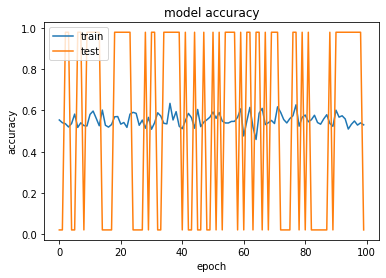

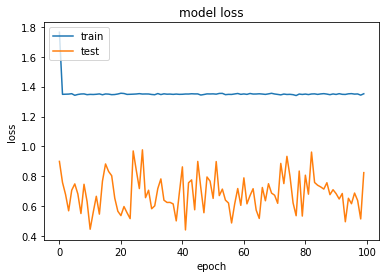

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()